<a href="https://colab.research.google.com/github/miguelangel18241/NickelASX/blob/main/Graph_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib


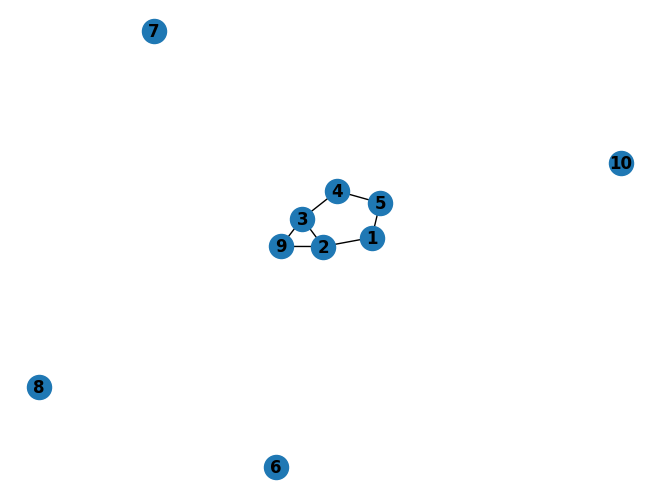

Is the graph connected? False
Shortest path from 1 to 4: [1, 5, 4]
Node degrees: [(1, 2), (2, 3), (3, 3), (4, 2), (5, 2), (6, 0), (7, 0), (8, 0), (9, 2), (10, 0)]
Clustering coefficient: {1: 0, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1.0, 10: 0}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5,6,7,8,9,10])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1),(9,2), (3,9)])

# Draw the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Check if the graph is connected
print(f"Is the graph connected? {nx.is_connected(G)}")

# Find the shortest path between nodes 1 and 4
shortest_path = nx.shortest_path(G, source=1, target=4)
print(f"Shortest path from 1 to 4: {shortest_path}")

# Calculate the degree of each node
degree = G.degree()
print("Node degrees:", degree)

# Calculate the clustering coefficient of each node
clustering_coefficient = nx.clustering(G)
print("Clustering coefficient:", clustering_coefficient)


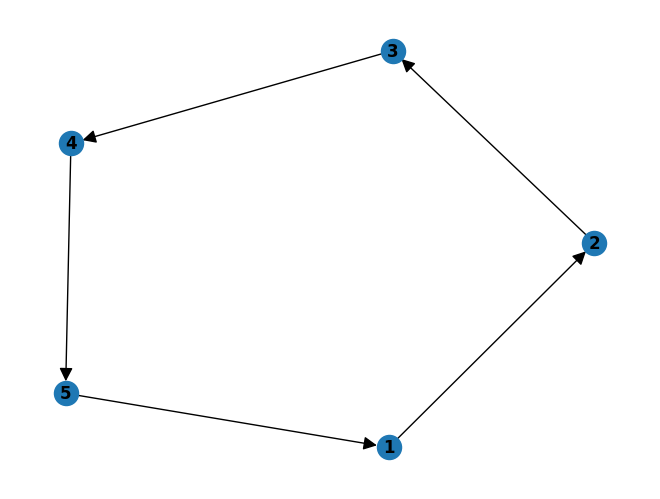

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add directed edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# Draw the directed graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', arrowsize=20, pos=pos)
plt.show()


In [ ]:
!pip install dgl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 34.3 MB/s eta 0:00:00


In [ ]:
!pip install torch
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.metrics import accuracy_score


# Create a sample graph
edge_index = torch.tensor([[0, 1, 2, 3, 4], [1, 2, 3, 4, 0]], dtype=torch.long)
x = torch.eye(5, dtype=torch.float)
y = torch.tensor([0, 1, 0, 1, 0], dtype=torch.long)

# Create a PyG Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Split the data into training and testing sets
train_mask, test_mask = train_test_split(range(data.num_nodes), test_size=0.2, random_state=42)

# Define a simple Graph Neural Network
class SimpleGNN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(in_feats, hidden_size)
        self.conv2 = GCNConv(hidden_size, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize the GNN model
model = SimpleGNN(5, 16, 2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(50):
    # Forward pass
    logits = model(data)

    # Compute loss
    loss = criterion(logits[train_mask], data.y[train_mask])

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss at every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{50}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
with torch.no_grad():
    logits_test = model(data)
    predicted_labels = logits_test.argmax(dim=1)
    true_labels = data.y[test_mask]

# Calculate accuracy on the test set
accuracy = (predicted_labels[test_mask] == true_labels).sum().item() / len(test_mask)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 10/50, Loss: 0.5625634789466858
Epoch 20/50, Loss: 0.4497726857662201
Epoch 30/50, Loss: 0.3559785783290863
Epoch 40/50, Loss: 0.2634185552597046
Epoch 50/50, Loss: 0.18087027966976166
Test Accuracy: 0.00%


In [ ]:
!pip install networkx matplotlib umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=a34b3c93ad1acf6a95f6758cdbdf588335c48507632fb90d4bb9403c5e46a6ed
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=1e48326e27b9687bf53e211723a80f9d579ebc85888deff2f9e2af4b1f874345
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


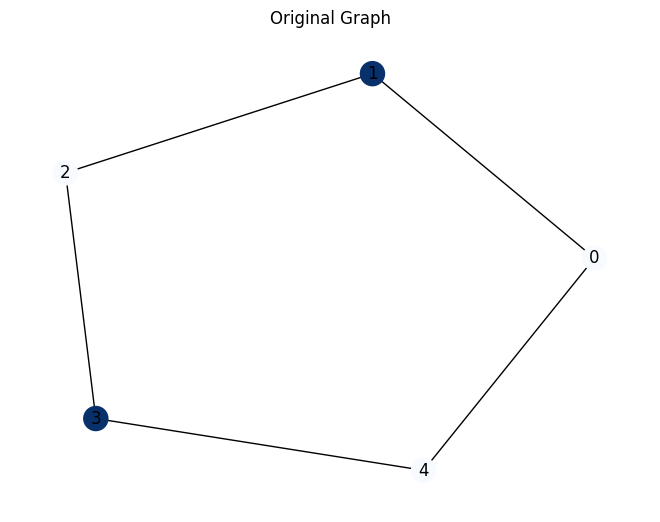

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.metrics import accuracy_score
import networkx as nx
import matplotlib.pyplot as plt
import umap

# ... (rest of your code remains the same)

# Function to visualize the graph using NetworkX
def visualize_graph(data):
    edge_list = data.edge_index.T.numpy()

    # Create a list of edges
    edges = [(edge[0], edge[1]) for edge in edge_list]

    G = nx.Graph(edges)

    # Visualize the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=data.y.numpy(), cmap=plt.cm.Blues)
    plt.title("Original Graph")
    plt.show()

# ... (rest of your code remains the same)

# Visualize the original graph
visualize_graph(data)

# ... (rest of your code remains the same)


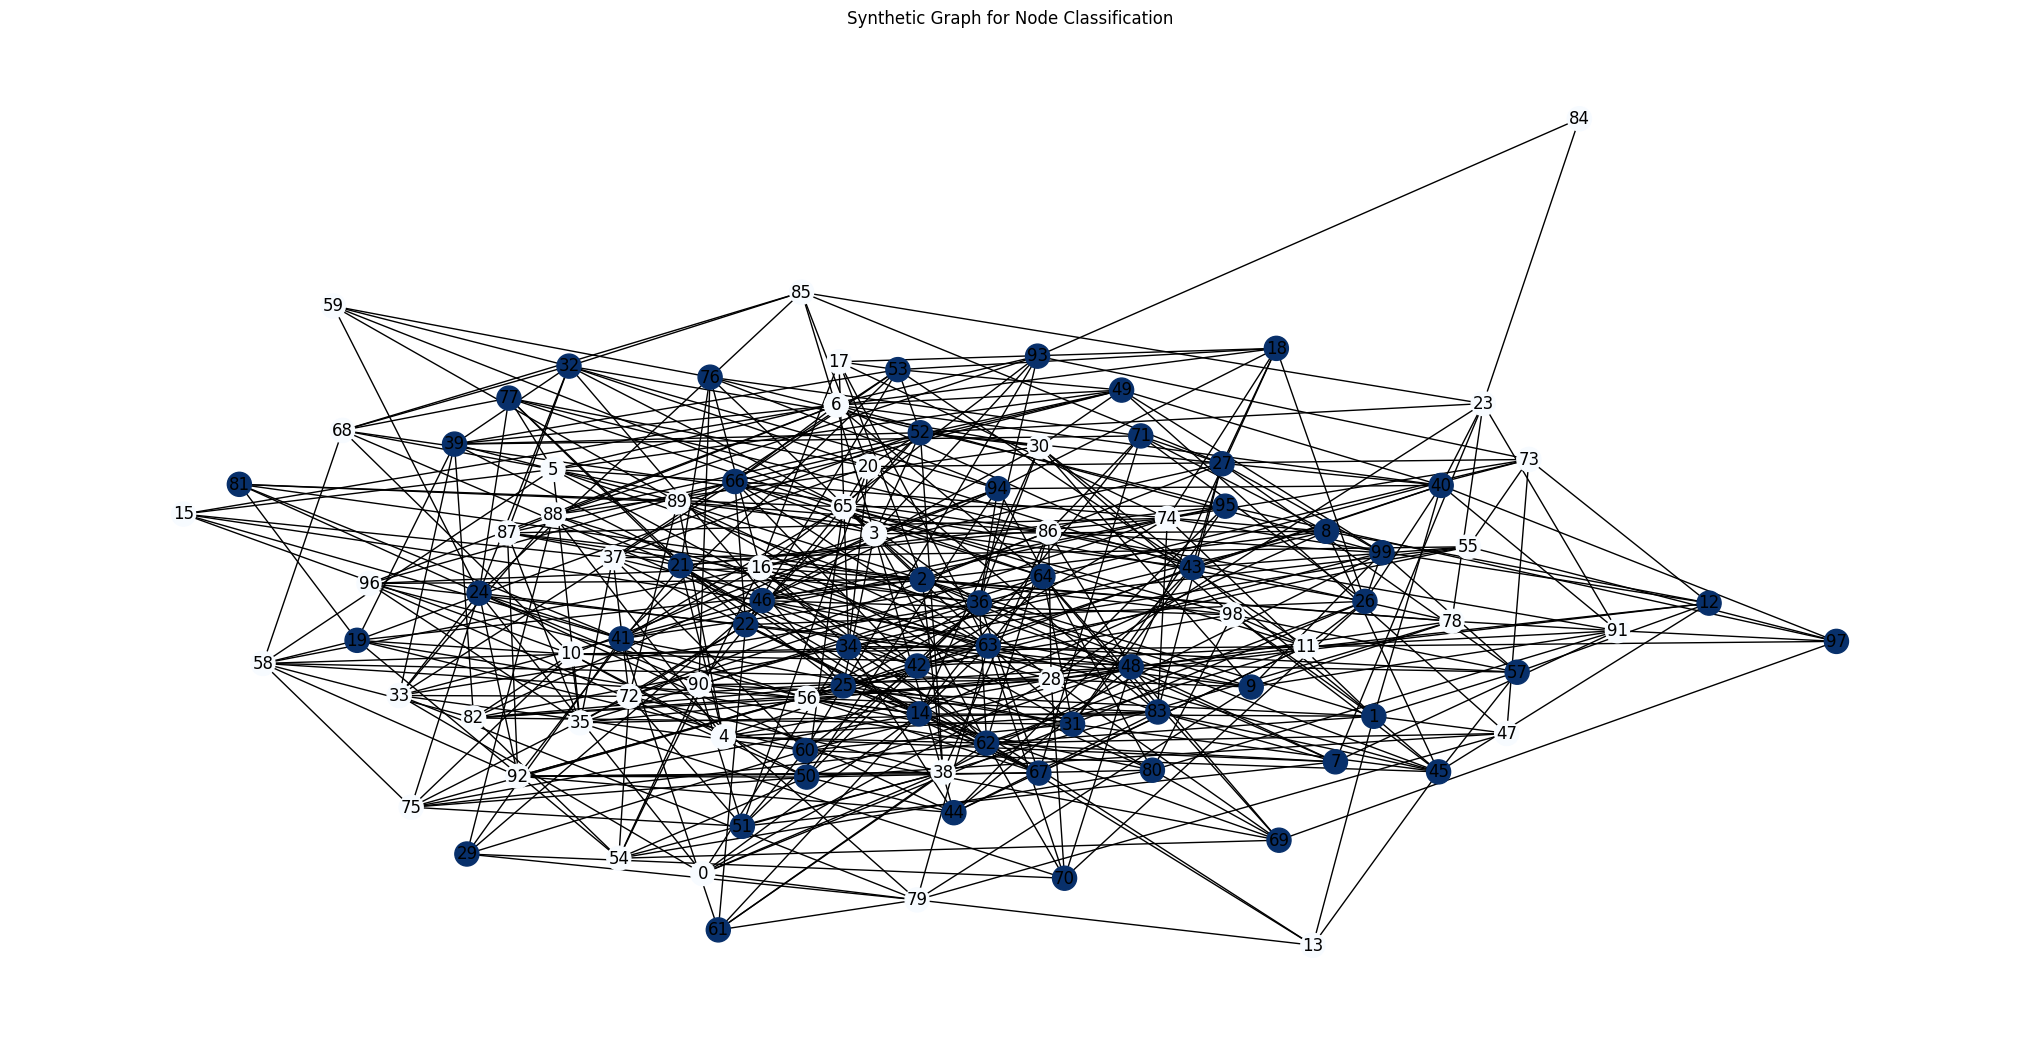

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data

# Generate a synthetic graph
G = nx.erdos_renyi_graph(100, 0.1)  # 100 nodes, probability of edge creation = 0.1

# Convert the NetworkX graph to a PyTorch Geometric Data object
edge_index = torch.tensor(list(G.edges)).t().contiguous()
x = torch.eye(G.number_of_nodes())
y = torch.randint(0, 2, (G.number_of_nodes(),), dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)


# Visualize the graph with a larger figure size
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=y.numpy(), cmap=plt.cm.Blues)
plt.title("Synthetic Graph for Node Classification")
plt.show()
